In [12]:
from datetime import datetime
from datetime import timedelta

In [167]:
with open('train/train.csv',"rt") as f:
    txt=f.read()
txt=txt.replace('2022-05-24 13:59:60','2022-05-24 14:00:00')
txt=txt.replace('2022-05-25 15:54.01','2022-05-25 15:54:01')
txt=txt.replace('2022-05-27 13:55:60','2022-05-27 13:56:00')
txt=txt.replace('2022-05-27 13:55:61','2022-05-27 13:56:01')
txt=txt.replace('2022-05-27 13:55:64','2022-05-27 13:56:04')
txt=txt.replace(': ',':')

with open('train/cleaned_train.csv',"wt") as f:
    f.write(txt)

In [48]:
import pandas as pd

train_df = pd.read_csv('train/train2.csv')
train_df['date_orig'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d %H:%M:%S')
train_df['date_int'] = train_df['date_orig'].apply(lambda x: x.value// 10 ** 9)
train_df.head()

,id,date,employee,action,date_orig,date_int
0,1256,2022-05-24 08:08:36,2,15.0,2022-05-24 08:08:36,1653379716
1,1257,2022-05-24 08:08:37,2,4.0,2022-05-24 08:08:37,1653379717
2,1258,2022-05-24 08:12:13,3,15.0,2022-05-24 08:12:13,1653379933
3,1259,2022-05-24 08:12:25,3,2.0,2022-05-24 08:12:25,1653379945
4,1260,2022-05-24 08:12:42,3,12.0,2022-05-24 08:12:42,1653379962


In [49]:
parsed_time_train1_df=pd.read_csv('parsed_time_train1.txt',sep='\t',names=['frame','date'])
parsed_time_train1_df['date_orig'] = pd.to_datetime(parsed_time_train1_df['date'], format='%m-%d-%Y %a %H:%M:%S')
parsed_time_train1_df['date'] = parsed_time_train1_df['date_orig'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
parsed_time_train1_df['date_int'] = parsed_time_train1_df['date_orig'].apply(lambda x: x.value// 10 ** 9)
parsed_time_train1_df.head()

,frame,date,date_orig,date_int
0,1,2022-05-24 08:08:33,2022-05-24 08:08:33,1653379713
1,2,2022-05-24 08:08:34,2022-05-24 08:08:34,1653379714
2,3,2022-05-24 08:08:34,2022-05-24 08:08:34,1653379714
3,4,2022-05-24 08:08:34,2022-05-24 08:08:34,1653379714
4,5,2022-05-24 08:08:34,2022-05-24 08:08:34,1653379714


In [66]:
# parsed_time_train2_df=pd.read_csv('parsed_time_train2.txt',sep='\t',names=['frame','date'])
# parsed_time_train2_df['date'] = pd.to_datetime(parsed_time_train2_df['date'], format='%m-%d-%Y %a %H:%M:%S',errors='ignore' )
# parsed_time_train2_df.head()

In [67]:
SPLIT_TRAIN1_AND_TRAIN2_ID=2522
train_df[train_df['id']<SPLIT_TRAIN1_AND_TRAIN2_ID].head()

,id,date,employee,action,date_orig,date_int
0,1256,2022-05-24 08:08:36,2,15.0,2022-05-24 08:08:36,1653379716
1,1257,2022-05-24 08:08:37,2,4.0,2022-05-24 08:08:37,1653379717
2,1258,2022-05-24 08:12:13,3,15.0,2022-05-24 08:12:13,1653379933
3,1259,2022-05-24 08:12:25,3,2.0,2022-05-24 08:12:25,1653379945
4,1260,2022-05-24 08:12:42,3,12.0,2022-05-24 08:12:42,1653379962


In [68]:
df = pd.merge(train_df[train_df['id']<SPLIT_TRAIN1_AND_TRAIN2_ID], parsed_time_train1_df, on=['date'], how="outer", indicator=True)
# df = df[df['_merge'] == 'left_only']
df = df[df['_merge'] == 'both']
df.head()

,id,date,employee,action,date_orig_x,date_int_x,frame,date_orig_y,date_int_y,_merge
0,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,12.0,2022-05-24 08:08:36,1.653380e+09,both
1,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,13.0,2022-05-24 08:08:36,1.653380e+09,both
2,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,14.0,2022-05-24 08:08:36,1.653380e+09,both
3,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,15.0,2022-05-24 08:08:36,1.653380e+09,both
4,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,16.0,2022-05-24 08:08:36,1.653380e+09,both


In [65]:
df.shape

(6243, 10)

# Находим границы дверей

### передние двери

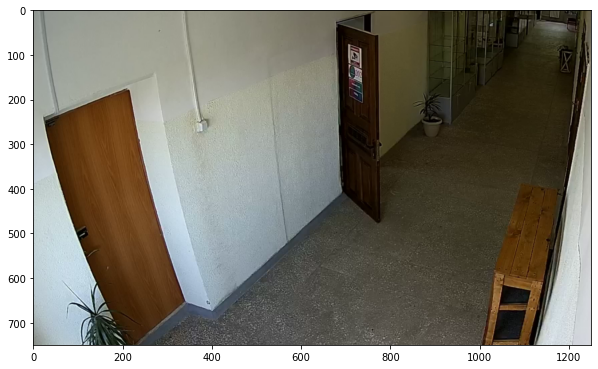

In [162]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

train1_path="/home/hacaton_irkutsk/train/train1"
img = cv2.imread(f"{train1_path}/out1.png", cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
newsize = (1920,1080)
  
# resize image
resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)
crop = resized[300:1050,100:1350]


fig = plt.figure(figsize=(10, 10))
plt.imshow(crop)
plt.show()

### дальние двери

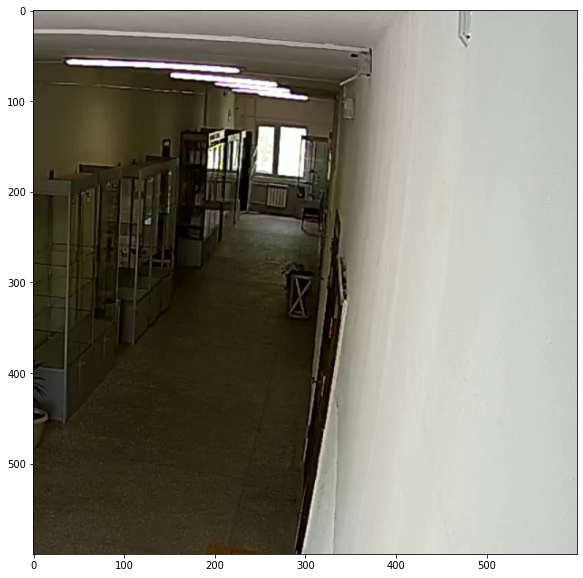

In [159]:
train1_path="/home/hacaton_irkutsk/train/train1"
img = cv2.imread(f"{train1_path}/out1.png", cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
newsize = (1920,1080)
  
# resize image
resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)
crop = resized[100:700,1000:1600]


fig = plt.figure(figsize=(10, 10))
plt.imshow(crop)
plt.show()

In [ ]:
from PIL import Image

# Opens a image in RGB mode
im = Image.open(f"{train1_path}/out1.png")

newsize = (1920,1080)
im1 = im.resize(newsize)

# Создаем датасет людей

In [70]:
df[df['employee']==2].shape

(698, 10)

In [89]:
employee_start_frames={}
employee_end_frames={}
for ind in df.index:
    action=df['action'][ind]
    if action in list(range(1,10)):
        if df['employee'][ind] not in employee_end_frames:
            employee_end_frames[df['employee'][ind]]=[]
        employee_end_frames[df['employee'][ind]].append(df['frame'][ind])
    elif action in list(range(11,20)):
        if df['employee'][ind] not in employee_start_frames:
            employee_start_frames[df['employee'][ind]]=[]
        employee_start_frames[df['employee'][ind]].append(df['frame'][ind])


In [90]:
for i in range(1,10):
    if i in employee_start_frames:
        print(f'Сотрудник {i} появился: {len(employee_start_frames[i])}')
    else:
        print(f'Сотрудник {i}: не найден')
        
    if i in employee_end_frames:
        print(f'Сотрудник {i} исчез: {len(employee_end_frames[i])}')
    else:
        print(f'Сотрудник {i}: не найден')

Сотрудник 1 появился: 100
Сотрудник 1 исчез: 90
Сотрудник 2 появился: 350
Сотрудник 2 исчез: 338
Сотрудник 3 появился: 847
Сотрудник 3 исчез: 876
Сотрудник 4 появился: 130
Сотрудник 4 исчез: 126
Сотрудник 5 появился: 505
Сотрудник 5 исчез: 510
Сотрудник 6 появился: 338
Сотрудник 6 исчез: 306
Сотрудник 7 появился: 85
Сотрудник 7 исчез: 79
Сотрудник 8 появился: 30
Сотрудник 8 исчез: 30
Сотрудник 9: не найден
Сотрудник 9: не найден


In [80]:
import random, os
import numpy as np
import torch
import glob
import pandas as pd
import os
from PIL import Image, ExifTags
import numpy as np
import pyheif 
from tqdm.notebook import tqdm
import json
import matplotlib.pyplot as plt
import piexif

def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(42)

In [75]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

In [78]:
people_detect_model = torch.hub.load('ultralytics/yolov5','custom', 'yolov5x6') #'ultralytics/yolov5', 'custom', 'yolov5s-cls.pt'
people_detect_model.classes = [0]


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-10 Python-3.8.10 torch-1.13.0.dev20220701+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


In [95]:
frame_id = int(employee_start_frames[1][40])
img_path=f"/home/hacaton_irkutsk/train/train1/out{frame_id}.png"

In [96]:
frame_id

17225

In [97]:
df[df['frame']==frame_id]

,id,date,employee,action,date_orig_x,date_int_x,frame,date_orig_y,date_int_y,_merge
1818,1624.0,2022-05-24 15:44:26,1.0,14.0,2022-05-24 15:44:26,1.653407e+09,17225.0,2022-05-24 15:44:26,1.653407e+09,both


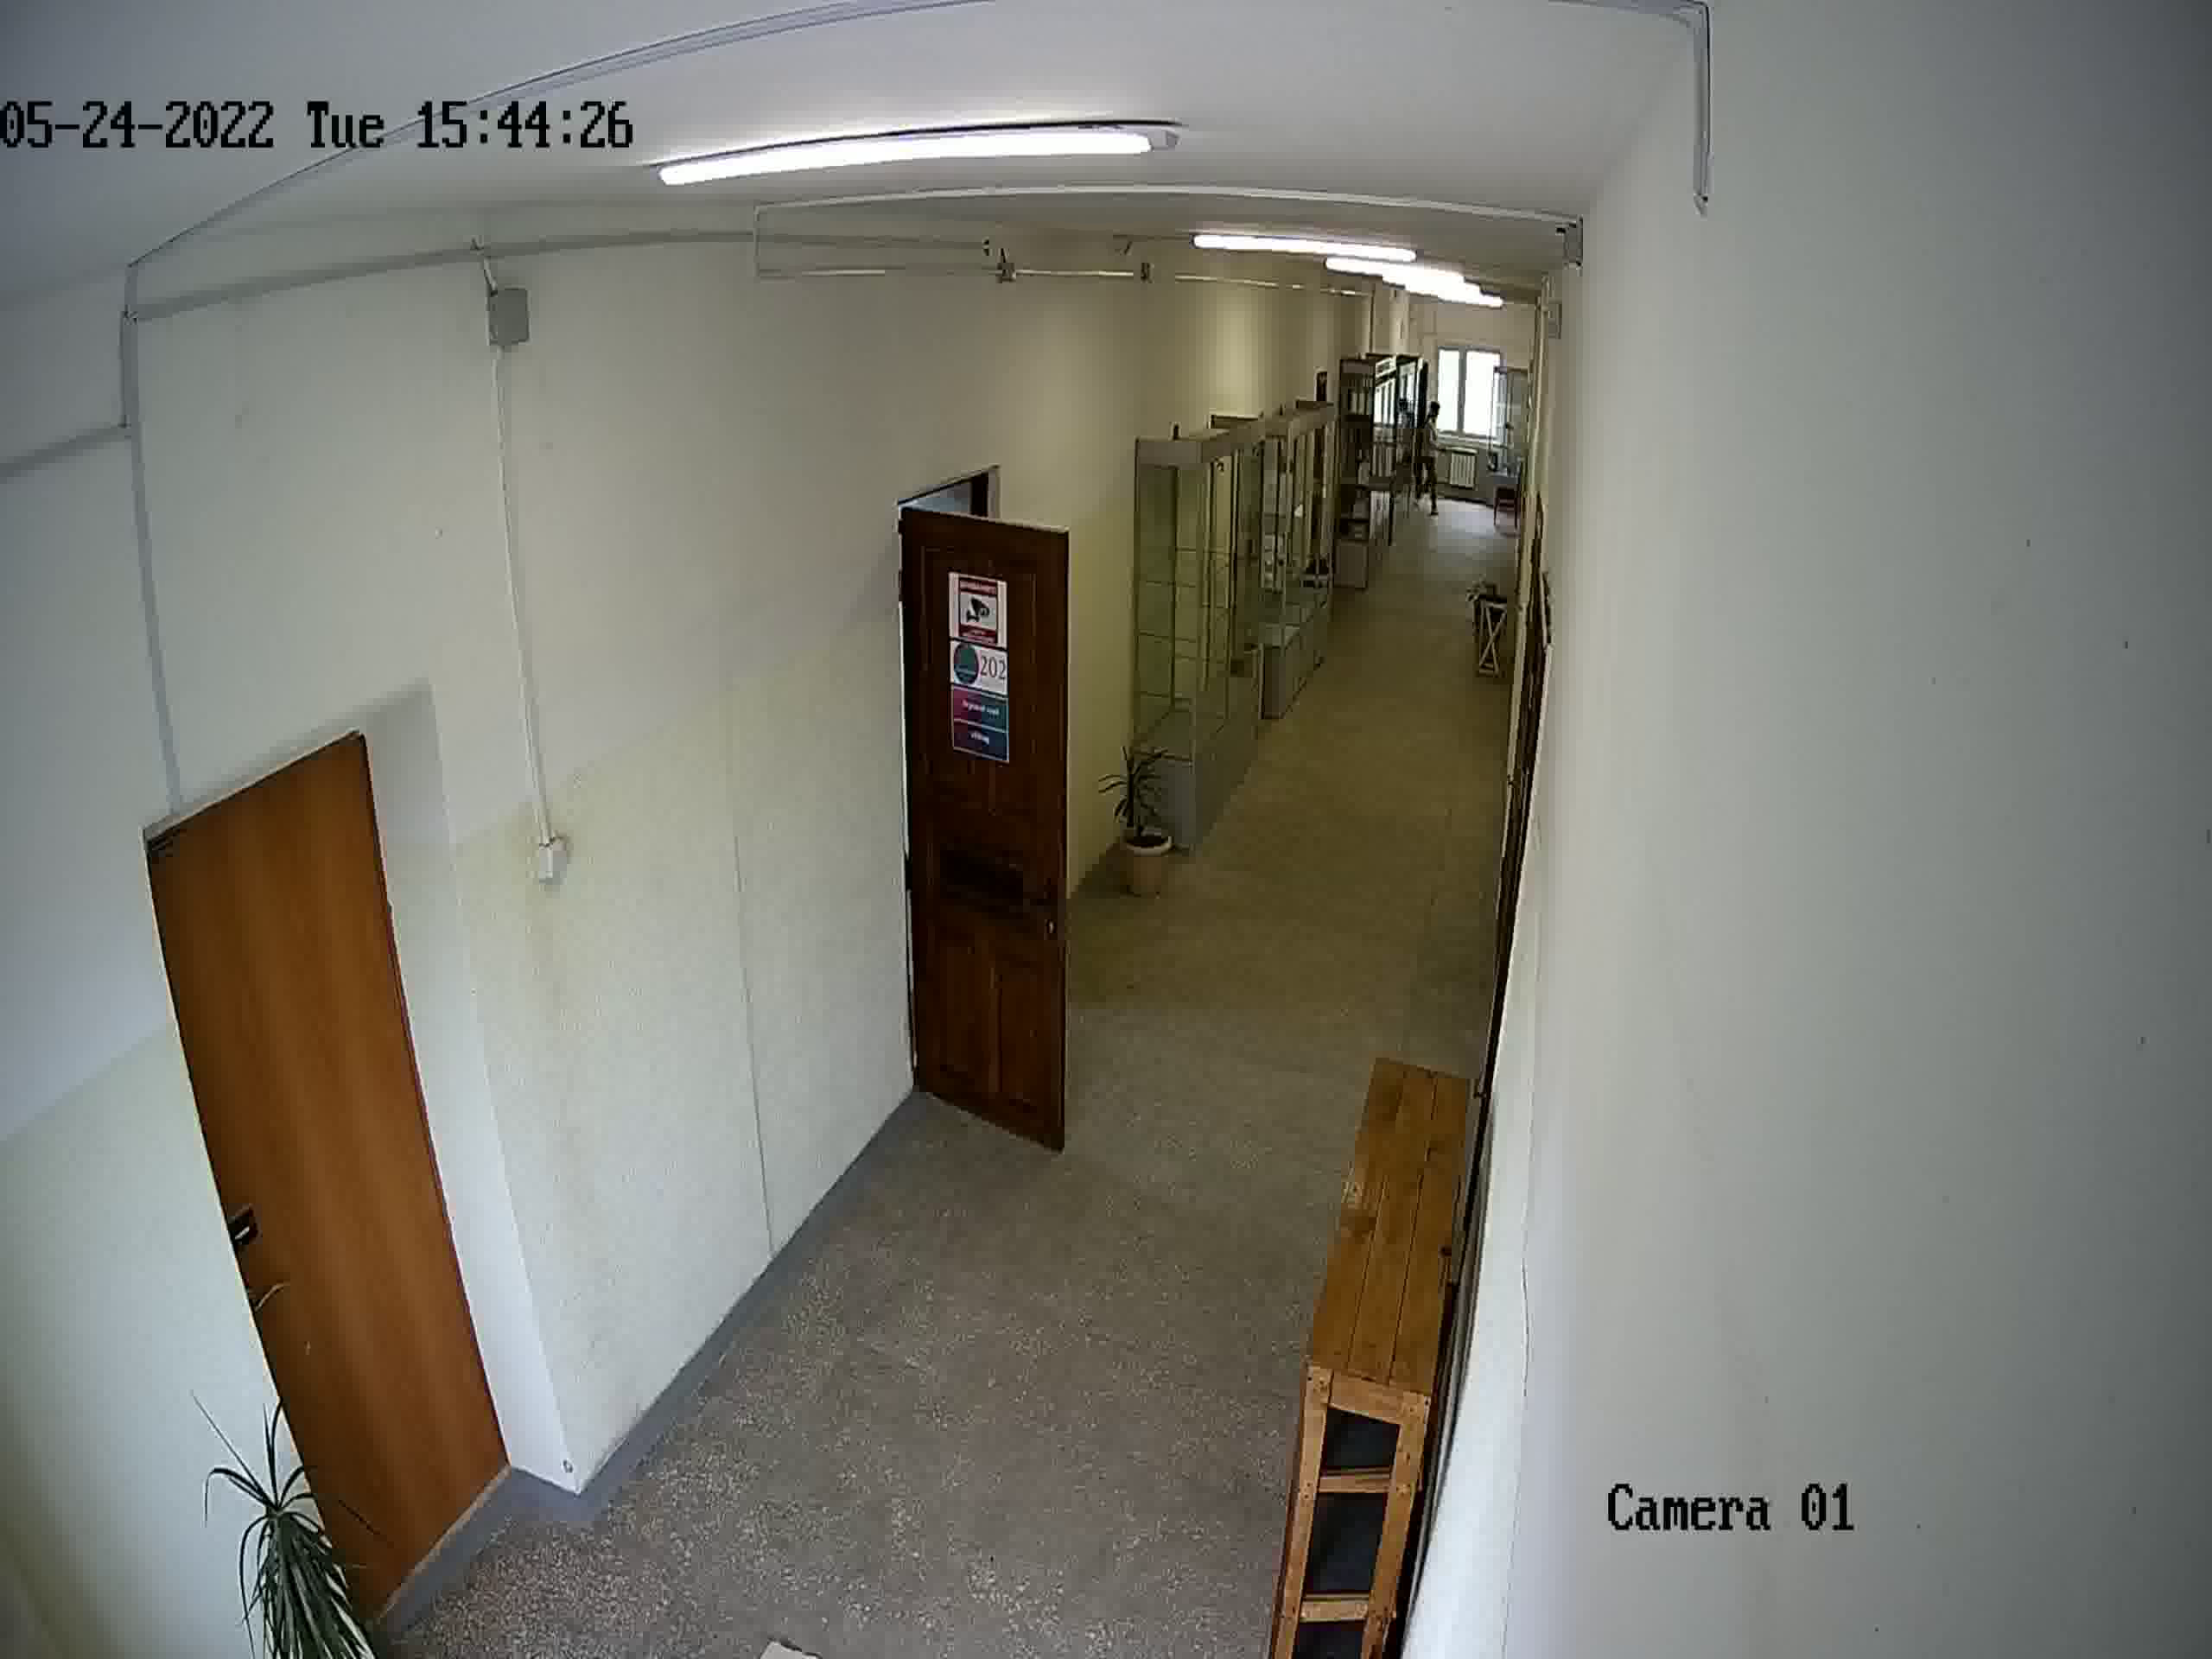

In [98]:
img = Image.open(img_path)
img
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(img)
# plt.show()
# img=np.array(img)

In [102]:
img=np.array(img)
results = people_detect_model(img)
    
#     if len(results.xyxy)>1:
#         break


In [103]:
results.xyxy[0].shape

torch.Size([0, 6])

In [ ]:
if results.xyxy[0].shape != torch.Size([0, 6]):
    results = [img_name,img.shape[0],img.shape[1]] + results.xyxy[0][0].cpu().numpy().tolist()
    train_car_data.append(results)

In [165]:
for fid in employee_start_frames[1]:
    fid=int(fid)
    print(fid)
    for i in range(fid,fid+5):
        print(i)
        img = cv2.imread(f"{train1_path}/out{int(i)}.png", cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        newsize = (1920,1080)
        resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)
        
        # front doors
        crop = resized[300:1050,100:1350]
        
        results = people_detect_model(crop)
        if results.xyxy[0].shape != torch.Size([0, 6]):
            find_region=results.xyxy[0][0].cpu().numpy()
            print(fid, 
                  results.xyxy[0].shape,
                  results.xyxy[0][0].cpu().numpy().tolist())
            bbox=np.array(find_region[:4])
            bbox = bbox.astype(int)
            crop=img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
            break
            
        # back doors
        crop = resized[100:700,1000:1600]
        
        results = people_detect_model(crop)
        if results.xyxy[0].shape != torch.Size([0, 6]):
            find_region=results.xyxy[0][0].cpu().numpy()
            print(fid, 
                  results.xyxy[0].shape,
                  results.xyxy[0][0].cpu().numpy().tolist())
            bbox=np.array(find_region[:4])
            bbox = bbox.astype(int)
            crop=img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
            break
    break

1552
1552
1552 torch.Size([1, 6]) [224.09117126464844, 151.83920288085938, 247.4056854248047, 228.6634979248047, 0.39110198616981506, 0.0]


1552
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1552 torch.Size([1, 6]) [1566, 1920, 2560, 1644.4716796875, 464.45465087890625, 1687.13037109375, 595.6327514648438, 0.4110644459724426, 0.0]
1552
find
1553
find
1554
find
1555
find
1556
find
1557
find
1558
find
1559
find
1560
find
1561
find
1562
find
1563
find
1564
find
1565
find
1566
find
1567
find
1568
find
1569
find
1570
find
1571
find


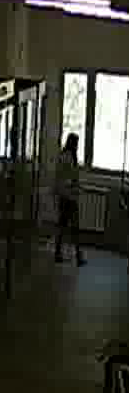

In [126]:
for fid in employee_start_frames[1]:
    fid=int(fid)
    print(fid)
    for i in range(fid,fid+5):
        print(i)
        img_path=f"/home/hacaton_irkutsk/train/train1/out{int(i)}.png"
        img = Image.open(img_path)

        img=np.array(img)
        results = people_detect_model(img)
        if results.xyxy[0].shape != torch.Size([0, 6]):
            find_region=results.xyxy[0][0].cpu().numpy()
            print(fid, 
                  results.xyxy[0].shape,
                  [i,img.shape[0],img.shape[1]] + results.xyxy[0][0].cpu().numpy().tolist())
            bbox=np.array(find_region[:4])
            bbox = bbox.astype(int)
            crop=img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
            break
            
    dw=bbox[2]-bbox[0]
    dh=bbox[3]-bbox[1]
    
    bbox[0]-=dw
    bbox[2]+=dw
    bbox[1]-=dh
    bbox[3]+=dh
    
    for i in range(fid,fid+20):
        print(i)
        crop=img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
        results = people_detect_model(crop)
        if results.xyxy[0].shape != torch.Size([0, 6]):
            print('find')
        
    break
    
im = Image.fromarray(crop)
im

In [124]:
bbox

array([1644,  464, 1687,  595])

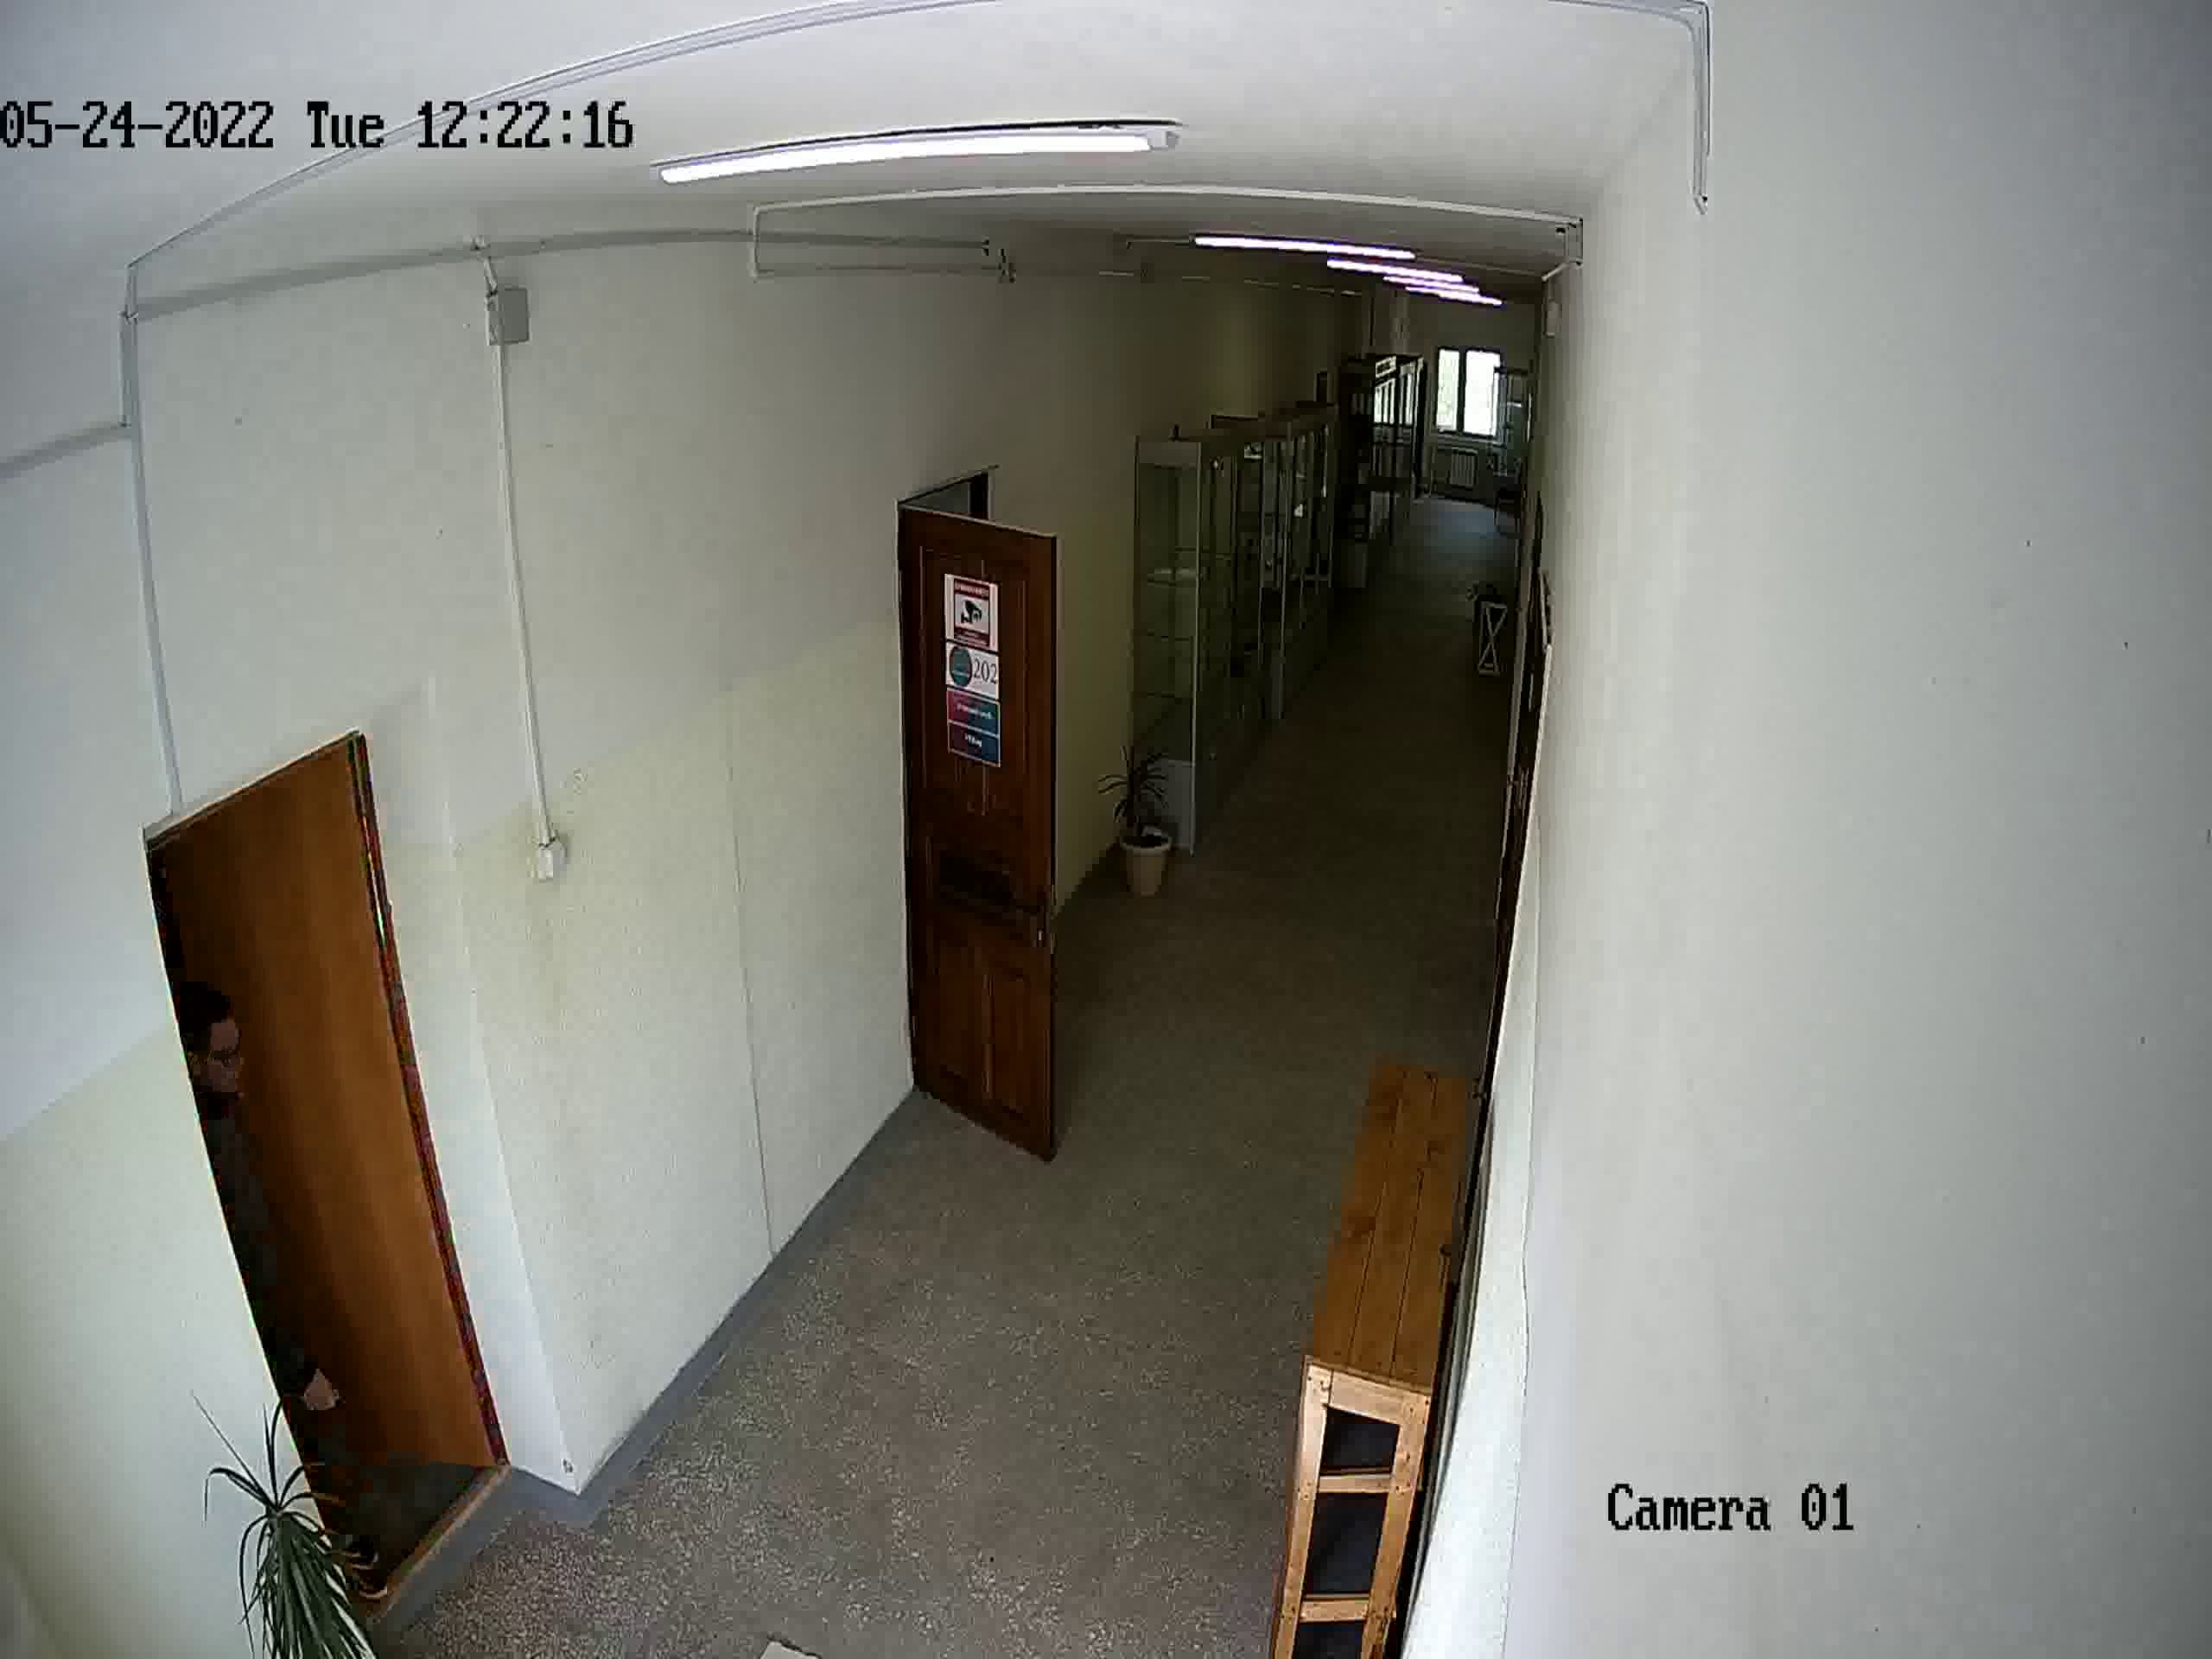

In [168]:
img_path=f"/home/hacaton_irkutsk/train/train1/out{int(8709)}.png"
img = Image.open(img_path)
img
# img=np.array(img)
# plt.imshow(img)
# plt.show()